##Problem Statement:

An automobile parts manufacturing company has collected data on transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your data science skills to find the underlying buying patterns of the customers, provide the company with suitable insights about their customers, and recommend customized marketing strategies for different segments of customers.



In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
#Loading the file
#The original file contains error in date format, hence the data sheet was copied to csv & uploaded here
#Further, since the dateformat needs to be corrected even in CSV, hence parse date is used.
df = pd.read_csv('Sales_Data.csv', parse_dates=['ORDERDATE'], dayfirst=True)

###Assumptions:

- In the data,  **days Since order** is taken as 2022-06-07 for the difference, we will be removing it & creating new Days difference baseline as 02-06-2020 (1st June 2020)



In [3]:
#Checking samples of the data
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10100,30,171.70,3,5151.00,2018-01-06,1429,Shipped,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium
1,10100,50,67.80,2,3390.00,2018-01-06,1529,Shipped,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium
2,10100,22,86.51,4,1903.22,2018-01-06,2096,Shipped,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small
3,10100,49,34.47,1,1689.03,2018-01-06,2836,Shipped,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small
4,10101,25,151.28,4,3782.00,2018-01-09,1573,Shipped,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,Keitel,Roland,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10425,49,112.46,9,5510.54,2020-05-31,1611,In Process,Trucks and Buses,127,S24_2300,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Medium
2743,10425,31,33.24,5,1030.44,2020-05-31,1686,In Process,Classic Cars,35,S24_2840,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
2744,10425,41,86.68,11,3553.88,2020-05-31,2104,In Process,Trucks and Buses,96,S32_1268,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Medium
2745,10425,11,43.83,6,482.13,2020-05-31,2180,In Process,Trucks and Buses,54,S32_2509,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small


In [4]:
#Since it shows 2 NaN after 2747, we will consider data before that only
df = df.iloc[:2747]

In [5]:
#Dimentions of the data
df.shape

(2747, 20)

#### Let's drop days since last order & create a new feature having time difference as : DateLast order - 06-01-2020


In [6]:
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
from datetime import datetime

temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days

In [7]:
#Checking first & last 5 samples of the data
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10100,30,171.70,3,5151.00,2018-01-06,Shipped,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium,877
1,10100,50,67.80,2,3390.00,2018-01-06,Shipped,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Medium,877
2,10100,22,86.51,4,1903.22,2018-01-06,Shipped,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small,877
3,10100,49,34.47,1,1689.03,2018-01-06,Shipped,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,Nashua,62005,USA,Young,Valarie,Small,877
4,10101,25,151.28,4,3782.00,2018-01-09,Shipped,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,Frankfurt,60528,Germany,Keitel,Roland,Medium,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10425,49,112.46,9,5510.54,2020-05-31,In Process,Trucks and Buses,127,S24_2300,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Medium,1
2743,10425,31,33.24,5,1030.44,2020-05-31,In Process,Classic Cars,35,S24_2840,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small,1
2744,10425,41,86.68,11,3553.88,2020-05-31,In Process,Trucks and Buses,96,S32_1268,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Medium,1
2745,10425,11,43.83,6,482.13,2020-05-31,In Process,Trucks and Buses,54,S32_2509,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small,1


In [8]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              



---
**Insights**

- The dataset contains 2747 entries with 20 columns.
- All columns have 2747 non-null values, hence no missing found
- Key columns include sales transaction details, customer information, product details, order status, and recency information.
- Data types vary across columns, including floats, datetime, and objects.


---




#### Numerical features
Since ORDERNUMBER is not relevant for the EDA here, we will drop for Exploratory data analysis & visualizations

In [9]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


### Categorical Features
- We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'

In [10]:
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))


Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


In [11]:
#Descriptive Summary of the dataset - Numeric features

display(round(df_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


In [12]:
#Descriptive Summary of the dataset - Categorical features

df.select_dtypes(include = ['object']).describe().T


,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259




---


**Insights**

1. **Sales Amount**: The average sales amount per transaction is approximately '3,553'. Customers make purchases ranging from '482.13' to '14,082.80.'

2. **Quantity Ordered**: On average, customers order approximately 35 items per transaction, with a minimum of 6 and a maximum of 97 items.

3. **Price Each**: The average price of each item in an order is approximately 101. Prices vary between a minimum of 26.88 and a maximum of 252.87.

4. **Manufacturer's Suggested Retail Price (MSRP)**: The average MSRP is approximately 00.69, with prices ranging from 33 to 214.


5. **Order Status**: The most common order status is "Shipped," occurring 2541 times.

6. **Product Line**: "Classic Cars" is the dominant product line with 949 entries.

7. **Customer Concentration**: "Euro Shopping Channel" is the top customer, with 259 transactions.

8. **Geographic Trends**: "Madrid" and "USA" are the most frequent city and country, respectively.

9. **Deal Sizes**: The majority of deals fall into the "Medium" category, accounting for 1349 cases.
---





#Exploratory Data Analysis

In [13]:
#Missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

- No missing values found

In [14]:
#Checking duplicate values
df.duplicated().sum()

0

- No Duplicate values found

## Univariate Analysis

In [33]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)

    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )

    plt.show()


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


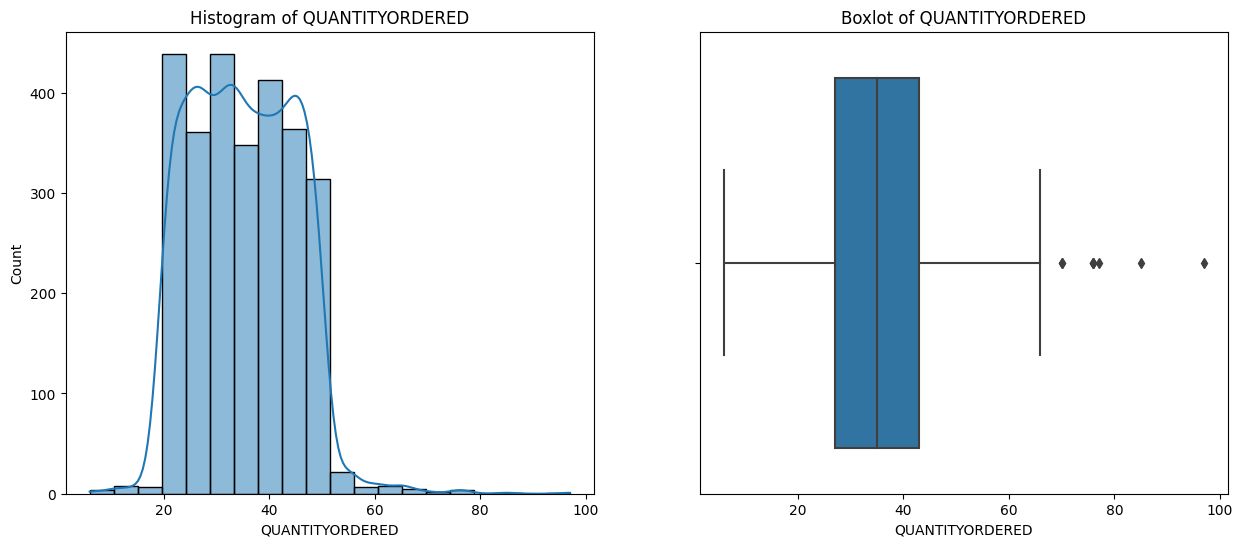

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


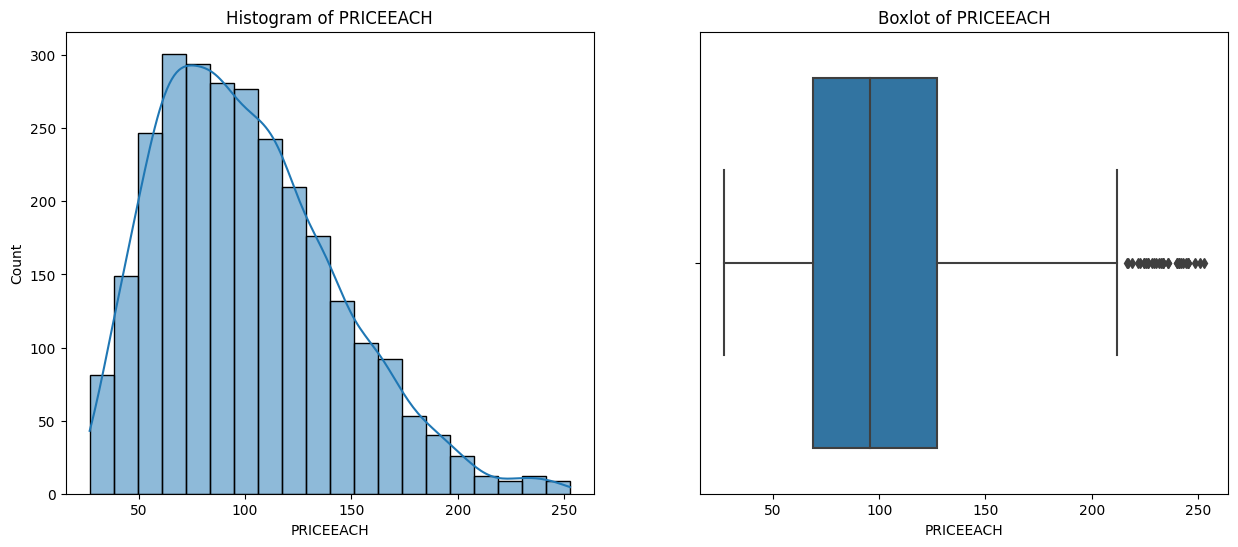

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


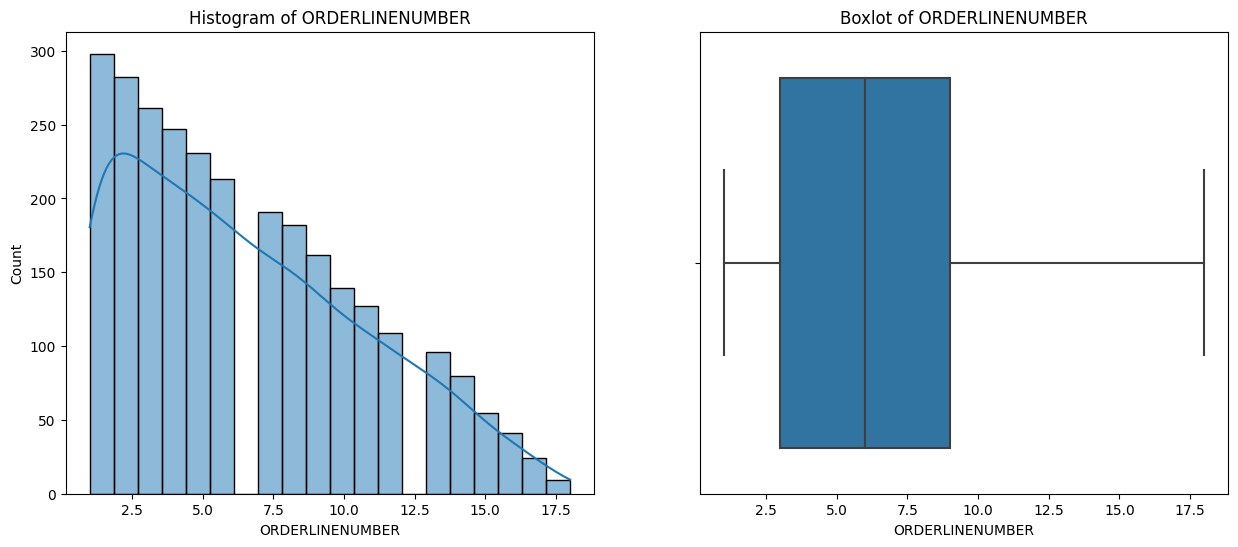

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


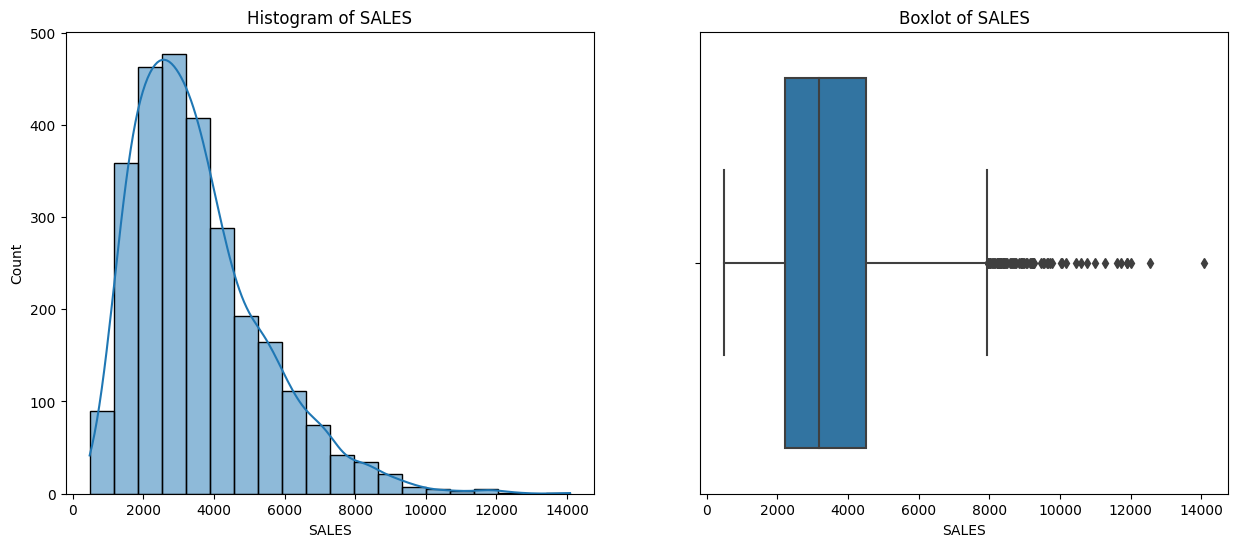

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


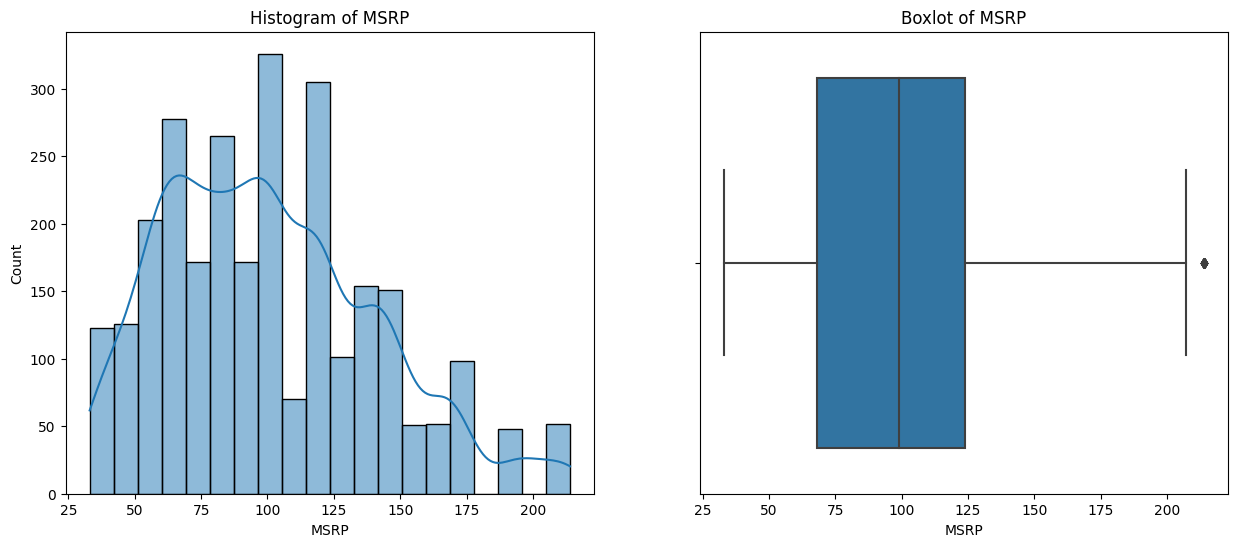

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


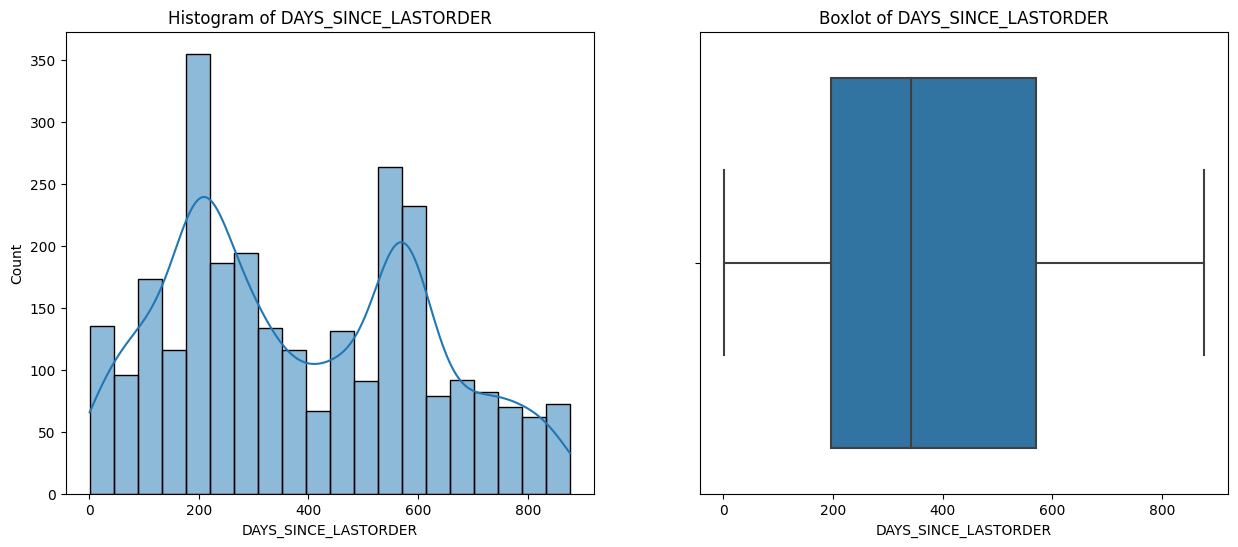

In [34]:
for x in df_num:
    univariateAnalysis_numeric(x,20)


In [ ]:
pip install squarify


- Plotting the count & % of each Categorical feature to understand distribution

In [ ]:
import squarify
# Defining function to plot bar & Treemap
def univariateAnalysis_category(cat_column):
    print("" + cat_column)
    print("----------------------------------------------------------------")
    value_counts = df_cat[cat_column].value_counts() #
    num_categories = len(value_counts)
    figsize = (num_categories * 1.5, 4)
    total_width = 12
    # Bar chart
    plt.figure(figsize=figsize)
    ax = value_counts.plot.bar(title="Barplot of " + cat_column)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()
    print("       ")
    # Treemap
    plt.figure(figsize=(total_width, 8))
    percentages = (value_counts / len(df_cat)) * 100
    labels = [f"{label}\n{percent:.1f}%" for label, percent in zip(value_counts.index, percentages)]
    color_scale = sns.color_palette("RdYlGn", as_cmap=True)
    color_values = color_scale(value_counts.values / value_counts.values.max())  # Adjust color intensity
    squarify.plot(sizes=value_counts, label=labels, alpha=0.7, color=color_values,
                  text_kwargs={'fontsize': 8, 'fontweight': 'normal', 'wrap': True})
    plt.title("Treemap of " + cat_column)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("       ")

STATUS
----------------------------------------------------------------


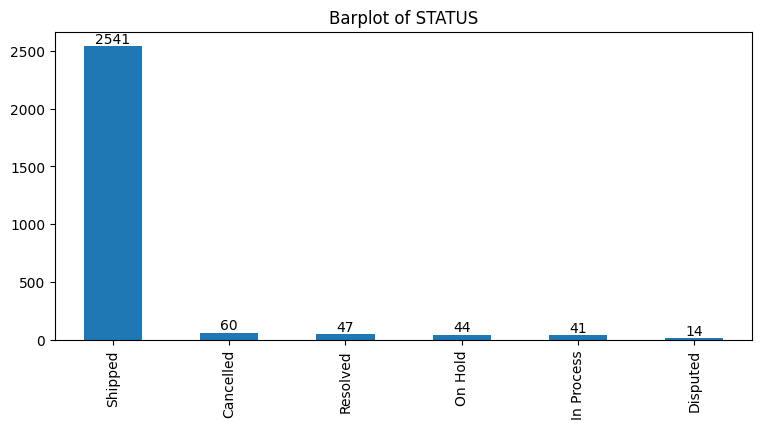

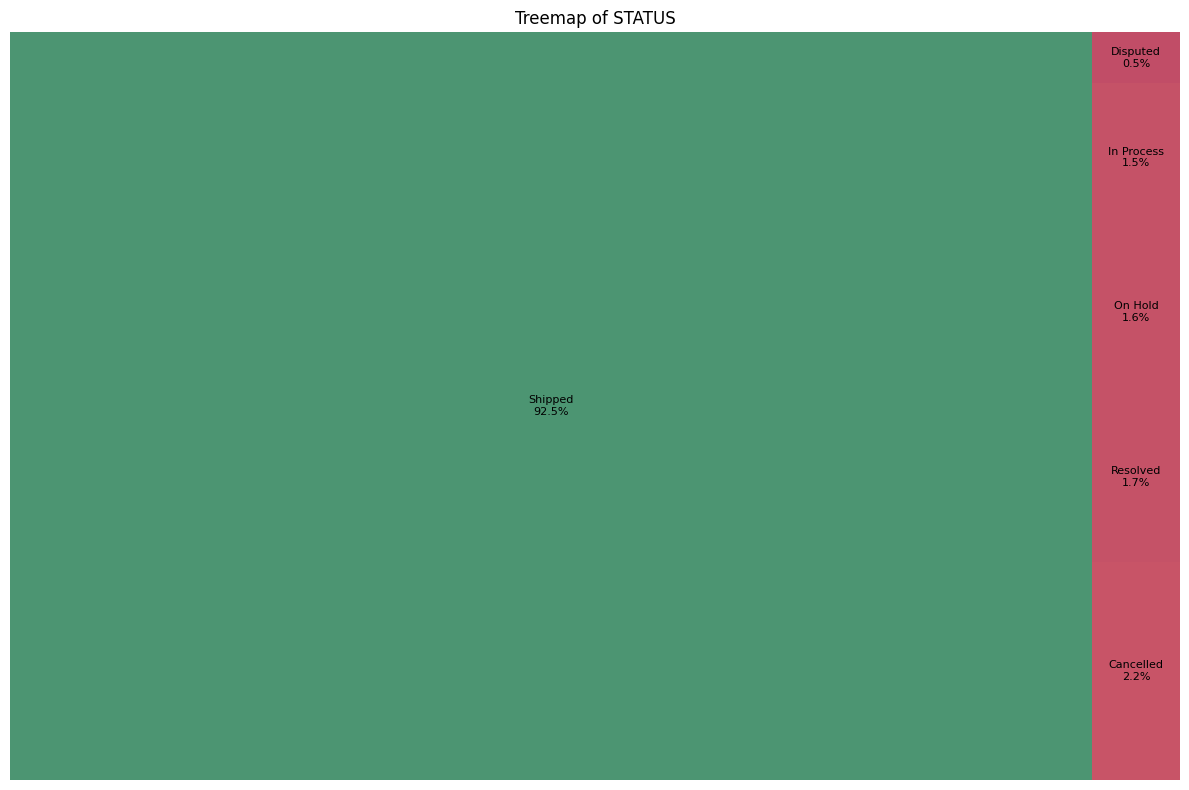

       
PRODUCTLINE
----------------------------------------------------------------


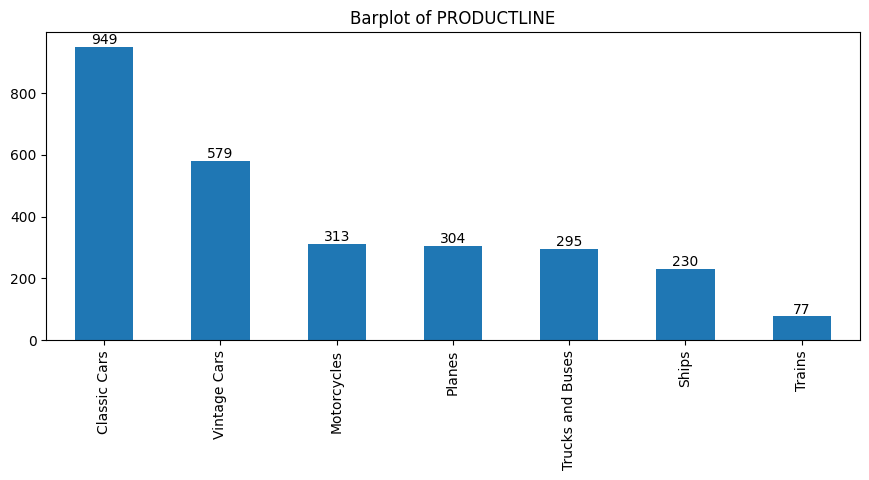

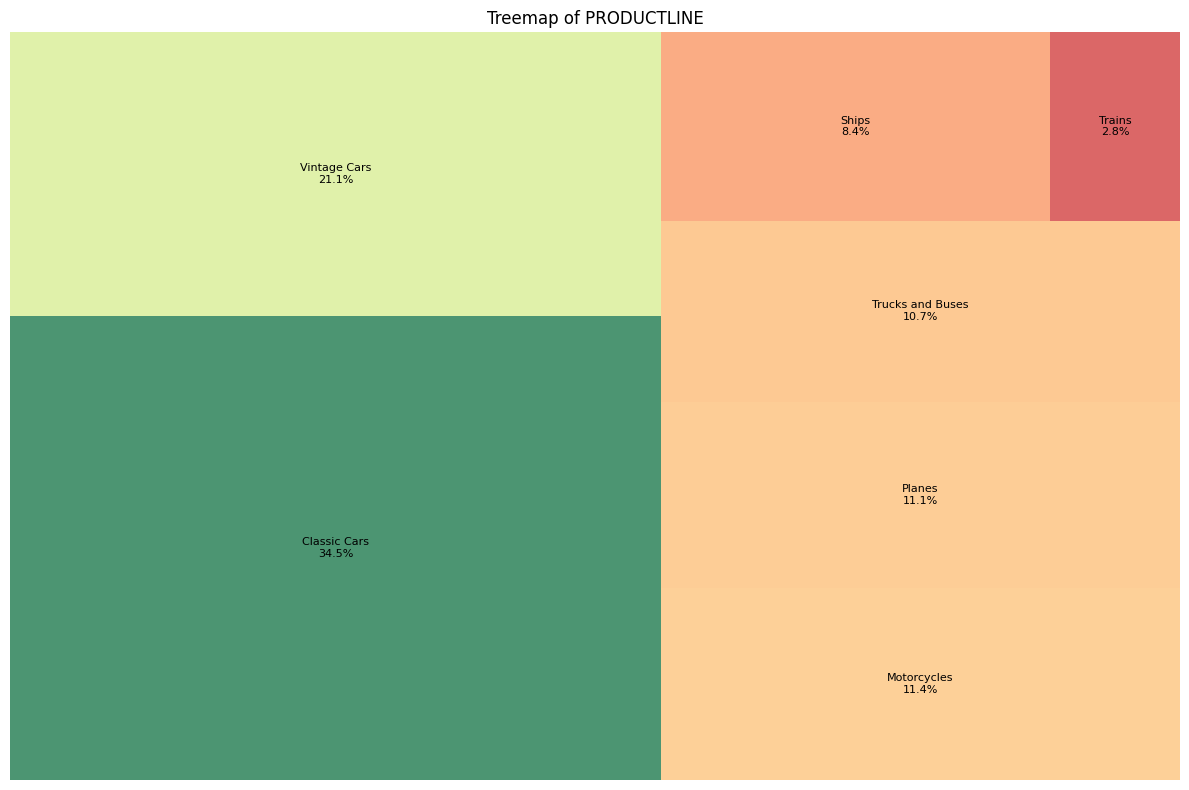

       
PRODUCTCODE
----------------------------------------------------------------


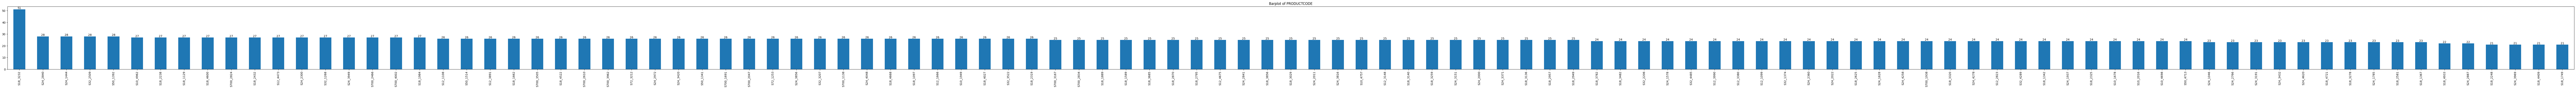

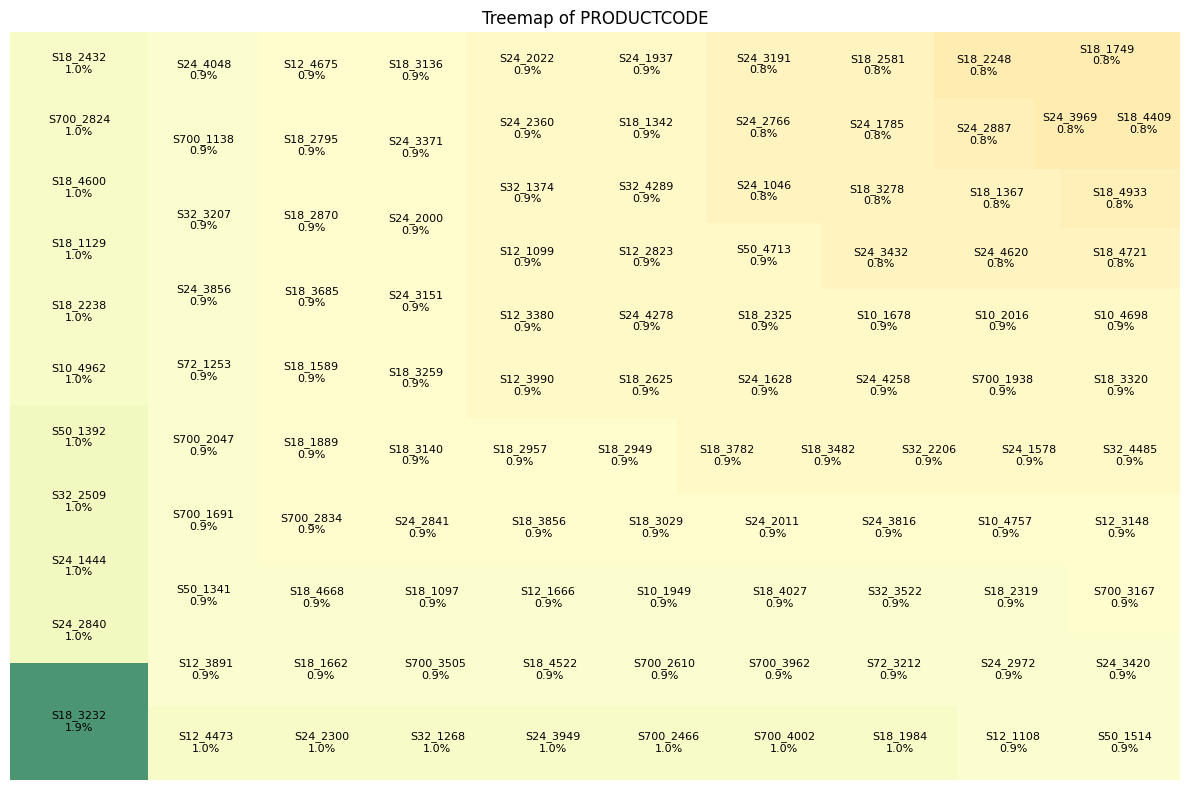

       
CUSTOMERNAME
----------------------------------------------------------------


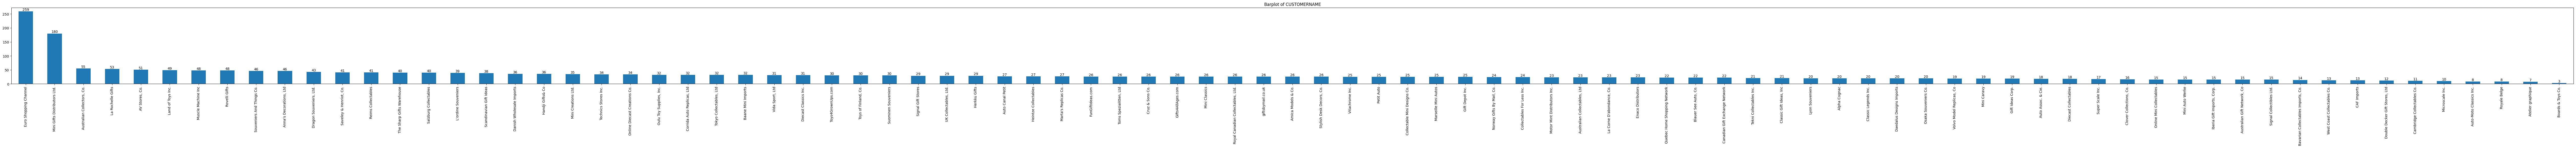

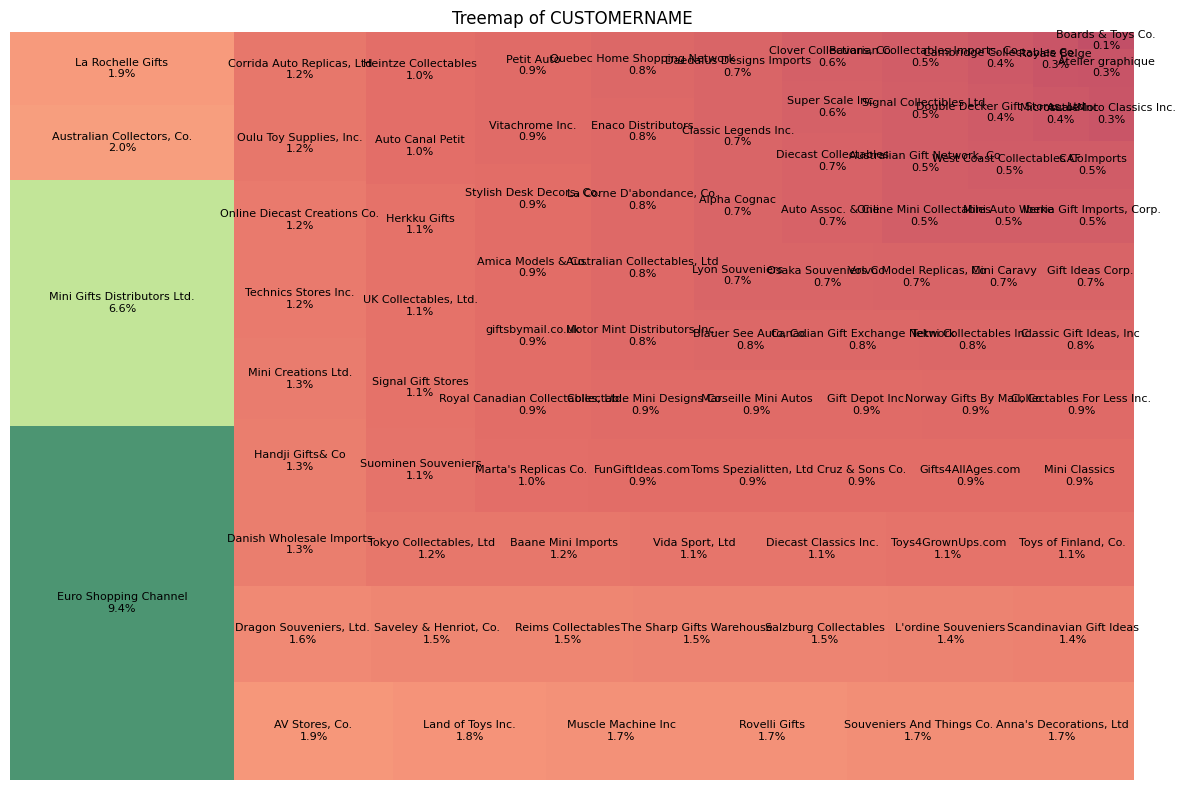

       
CITY
----------------------------------------------------------------


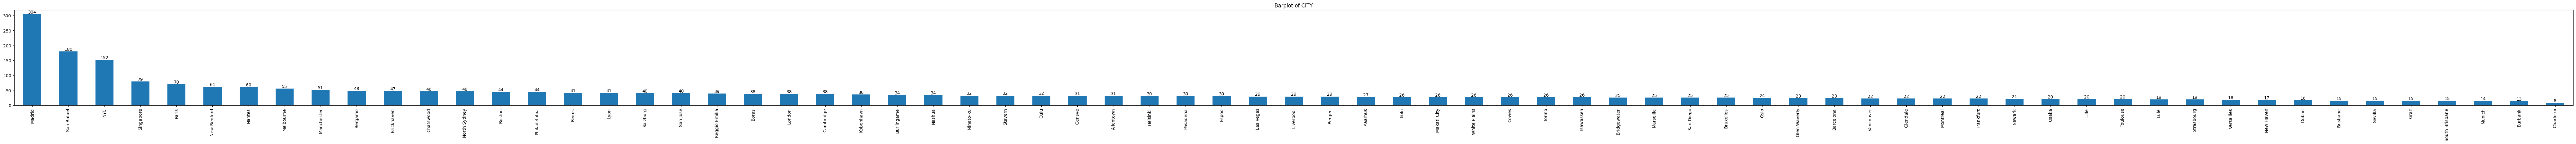

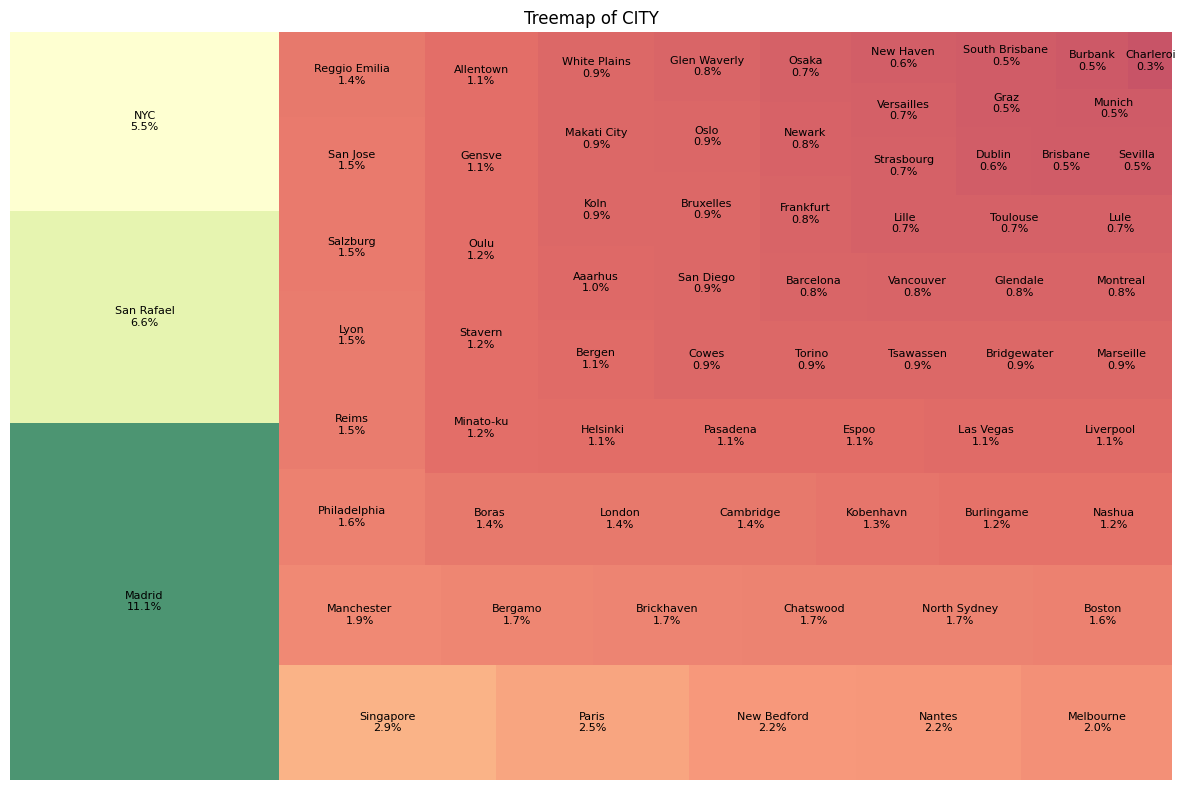

       
POSTALCODE
----------------------------------------------------------------


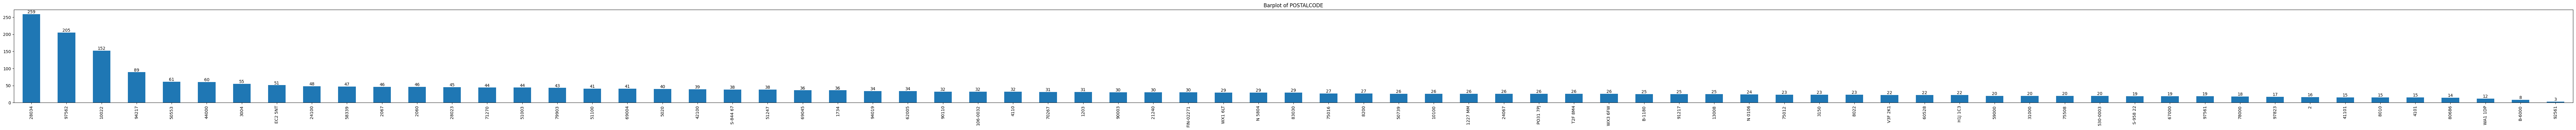

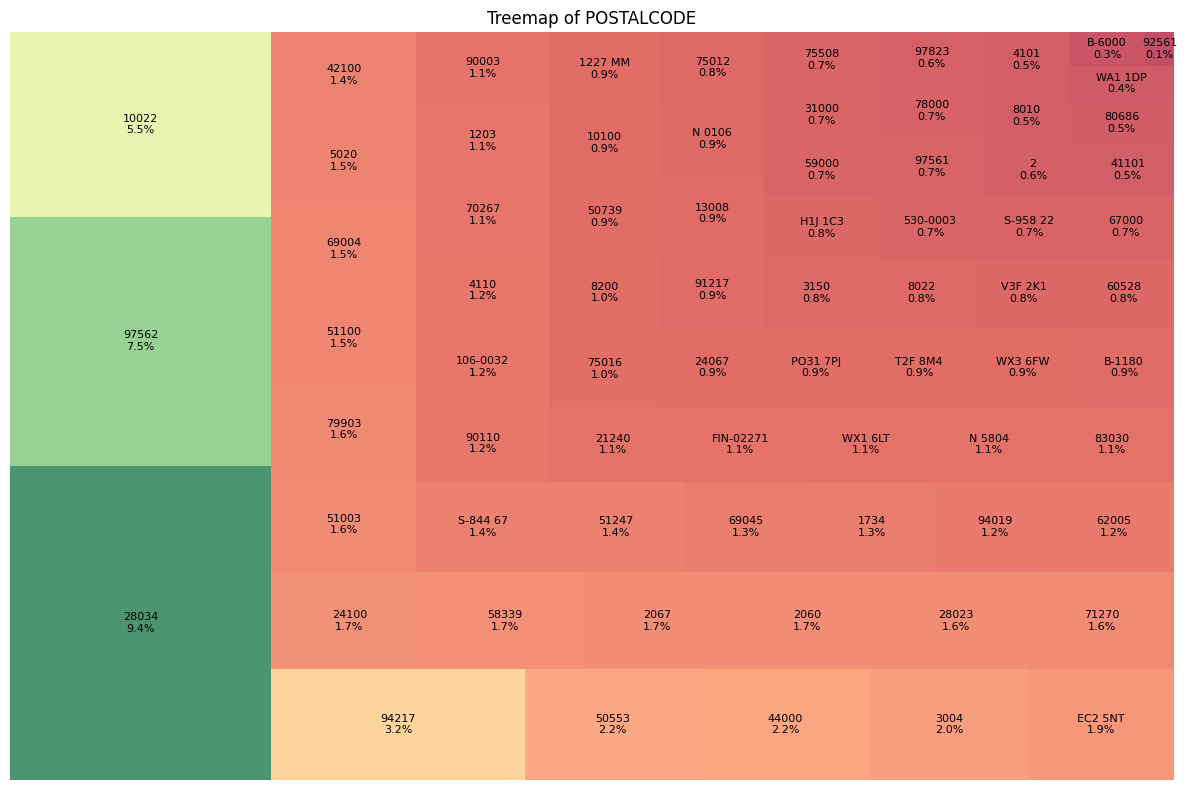

       
COUNTRY
----------------------------------------------------------------


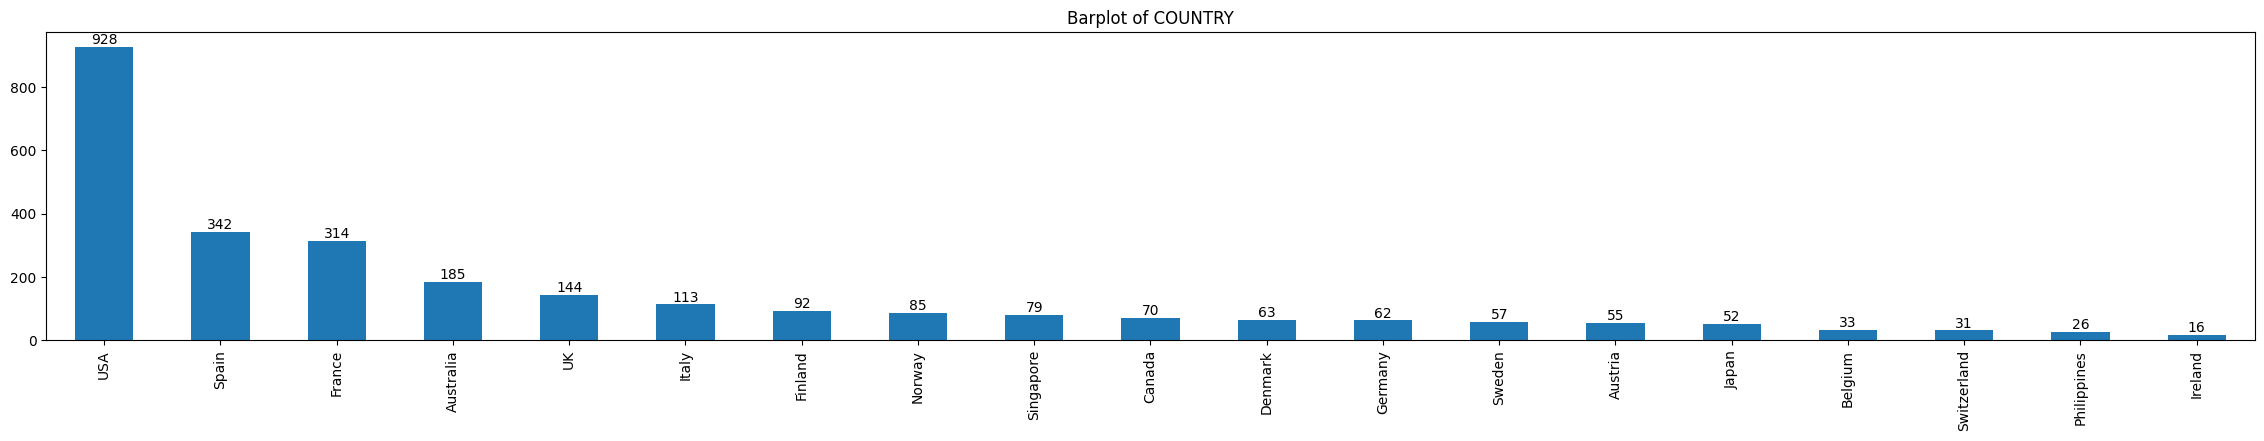

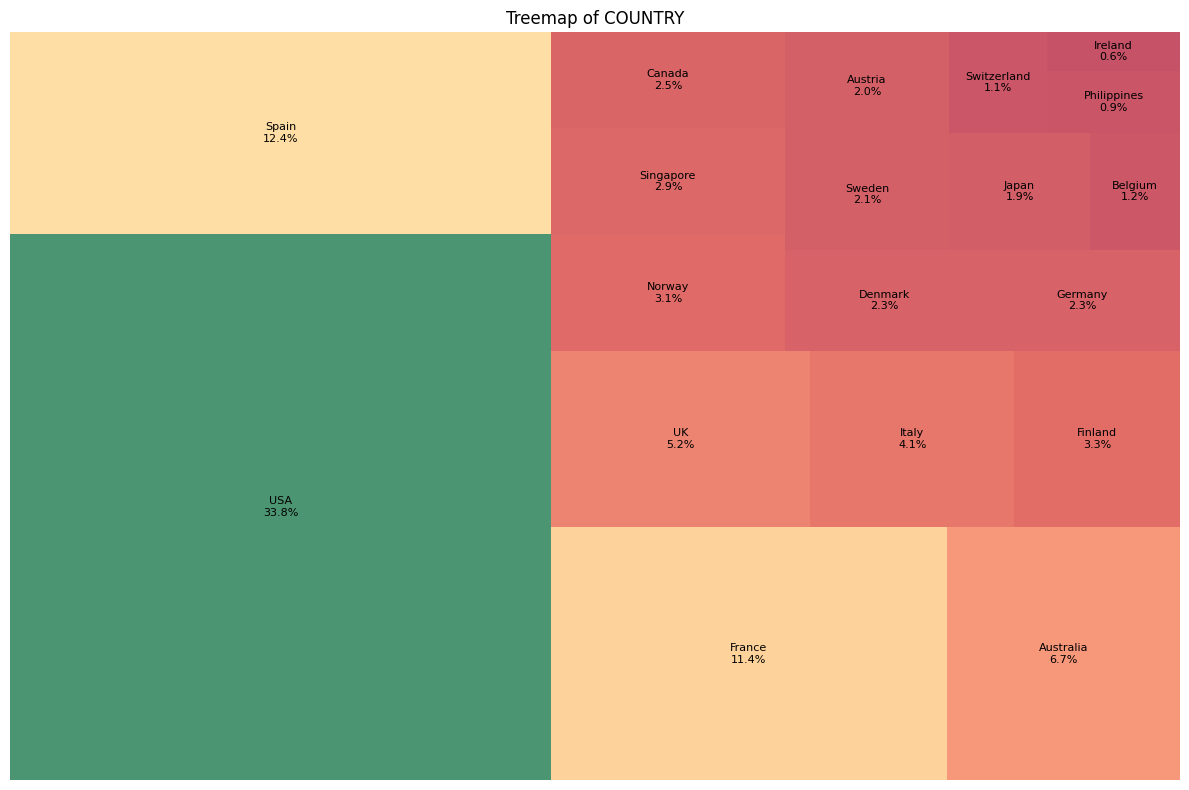

       
DEALSIZE
----------------------------------------------------------------


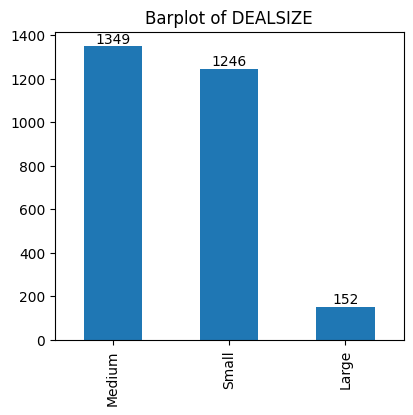

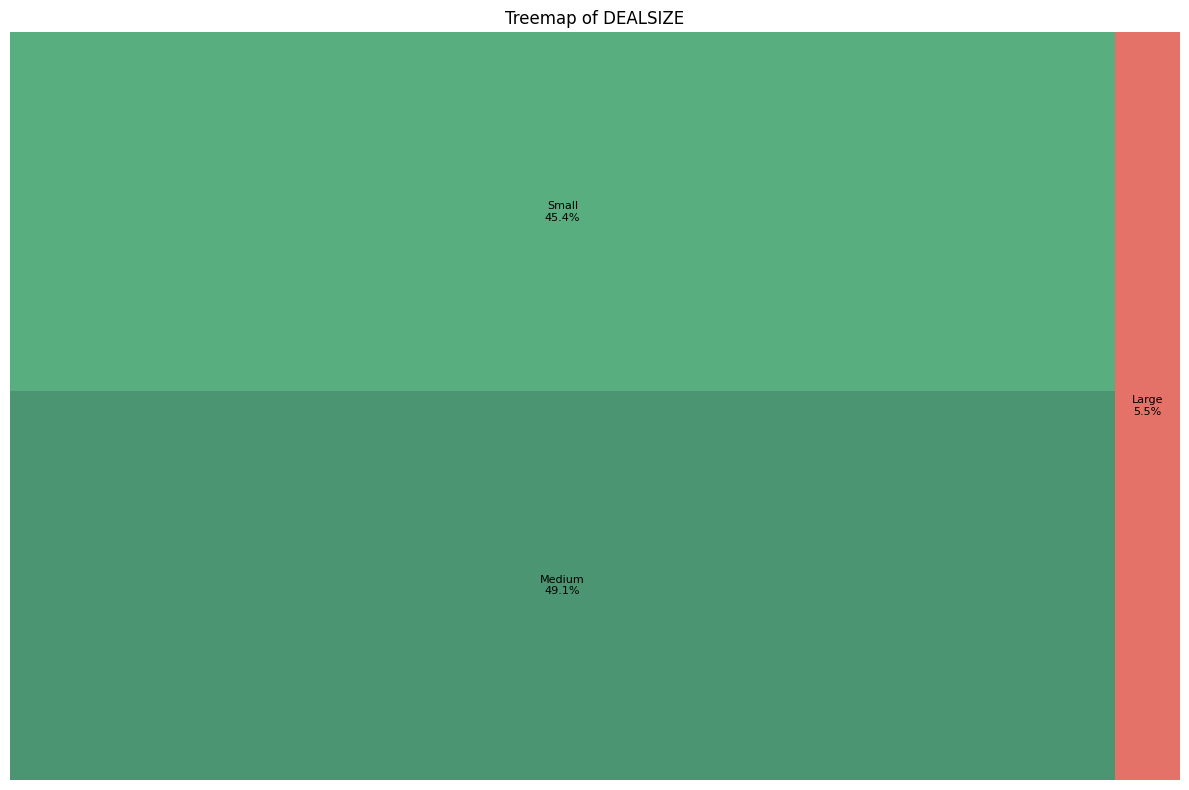

In [ ]:
#Show the plots
for x in df_cat:
    univariateAnalysis_category(x)

#### Outliers

<Figure size 1000x600 with 0 Axes>

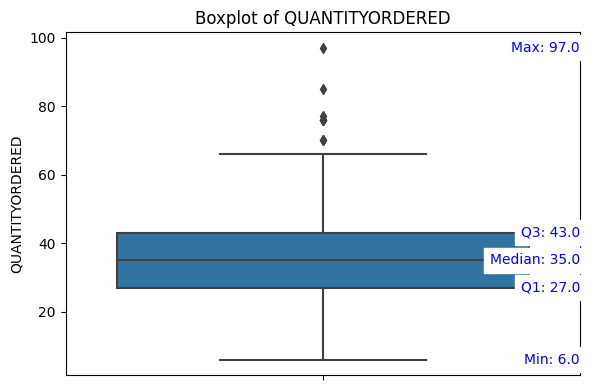

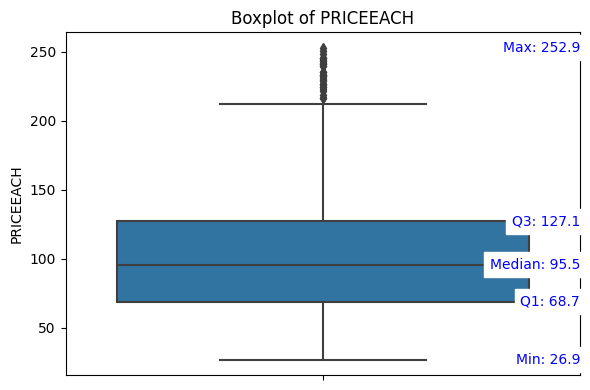

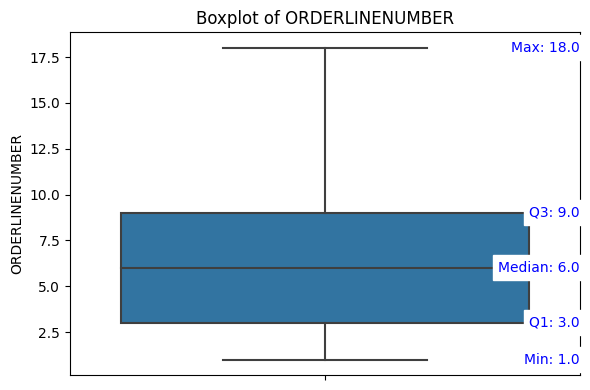

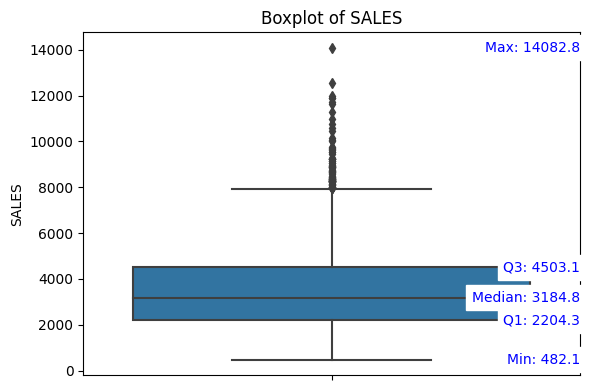

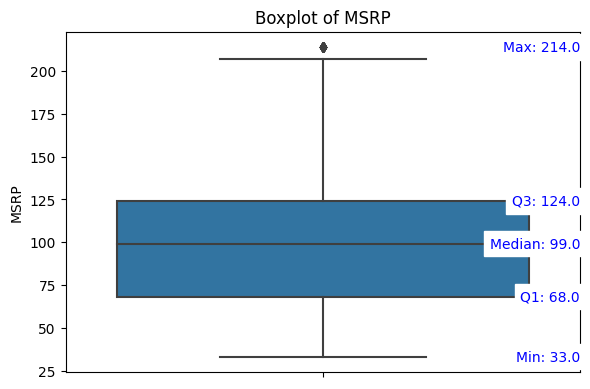

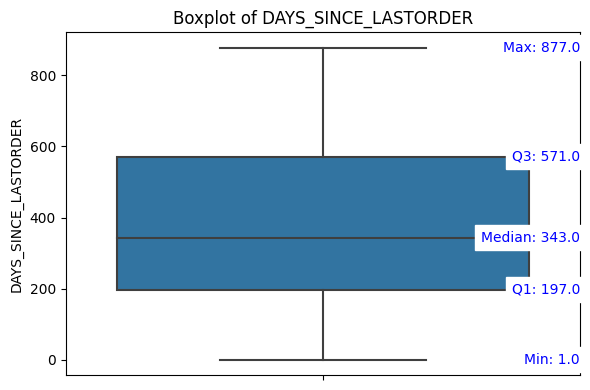

In [ ]:
plt.figure(figsize=(10, 6))
feature_list = df_num.columns
for i, feature in enumerate(feature_list):
    plt.figure(figsize=(6, 4))
    # Create a boxplot
    sns.boxplot(y=df_num[feature], data=df_num)
    data = df_num[feature]
    q1, median, q3 = np.percentile(data, [25, 50, 75])
    labels = ['Min', 'Q1', 'Median', 'Q3', 'Max']
    values = [data.min(), q1, median, q3, data.max()]
    for q_val, label in zip(values, labels):
        plt.text(0.5, q_val, f'{label}: {q_val:.1f}', va='center', ha='right', backgroundcolor='w', fontsize=10, color='b')
    plt.title('Boxplot of {}'.format(feature))
    plt.tight_layout()
plt.show();

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [ ]:
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))

fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [ ]:
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

## Bivariate Analysis

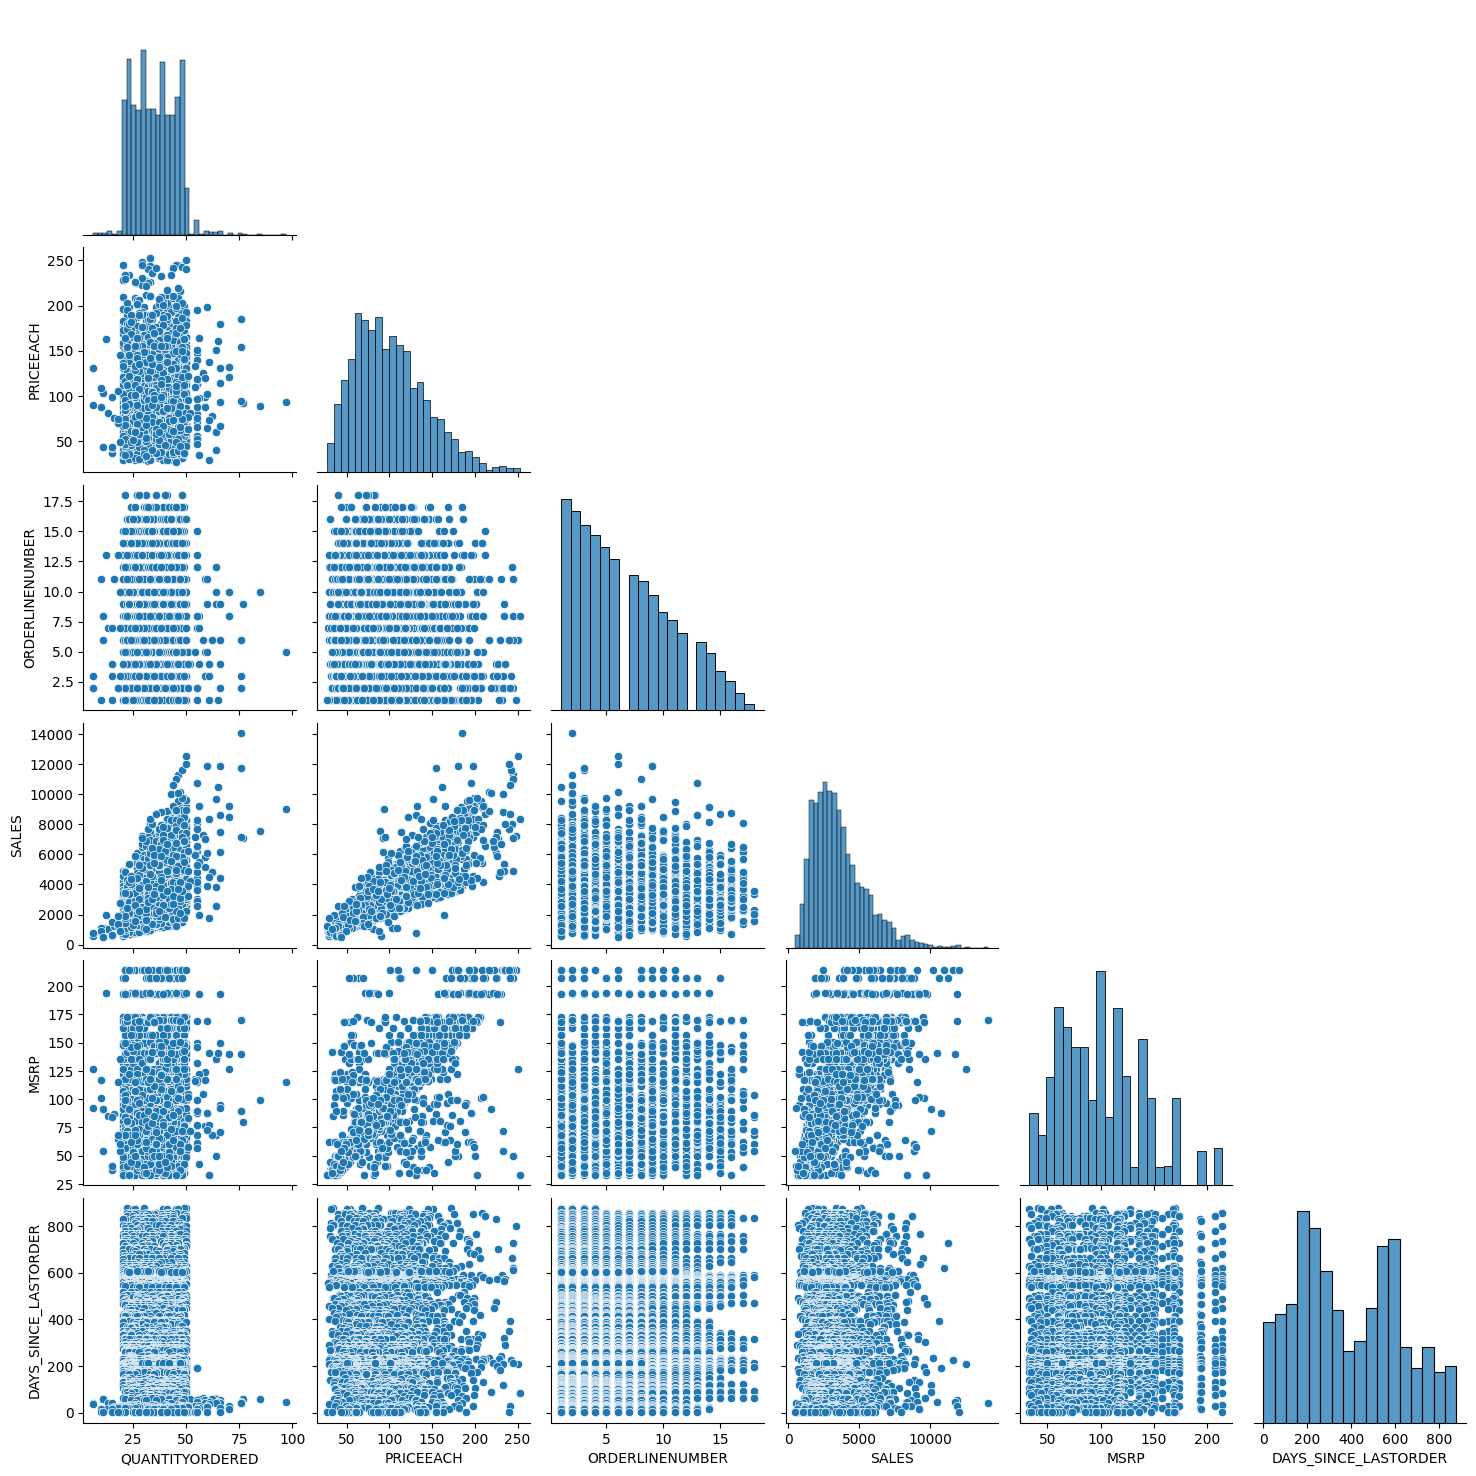

In [ ]:
sns.pairplot(data=df_num, corner = True )

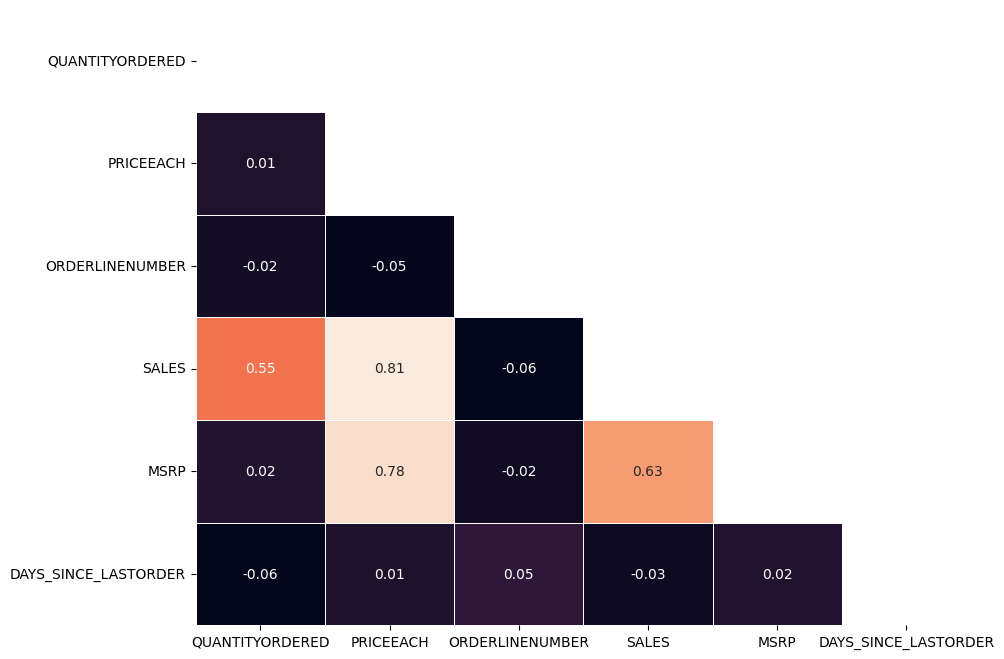

In [ ]:
corr = df_num.corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()


**Insights**

1. **Quantity Ordered and Sales**: When customers order more items ('QUANTITYORDERED'), it's often associated with higher sales ('SALES'). So, the more customers buy, the more the company earns in sales.

2. **Price and Sales**: There's a strong connection between the price of each item ('PRICEEACH') and the total sales ('SALES'). When items are priced higher, the company tends to make more in sales. So, pricing plays a significant role in revenue.

3. **MSRP and Price**: The price at which items are sold ('PRICEEACH') is closely related to the manufacturer's suggested retail price ('MSRP'). In most cases, the selling price is quite similar to what the manufacturer recommends.

4. **Days Since Last Order**: The time elapsed since a customer's last order ('DAYS_SINCE_LASTORDER') has a weak connection with the quantity of items ordered. Customers who order more frequently may tend to buy smaller quantities, but this relationship isn't very strong.

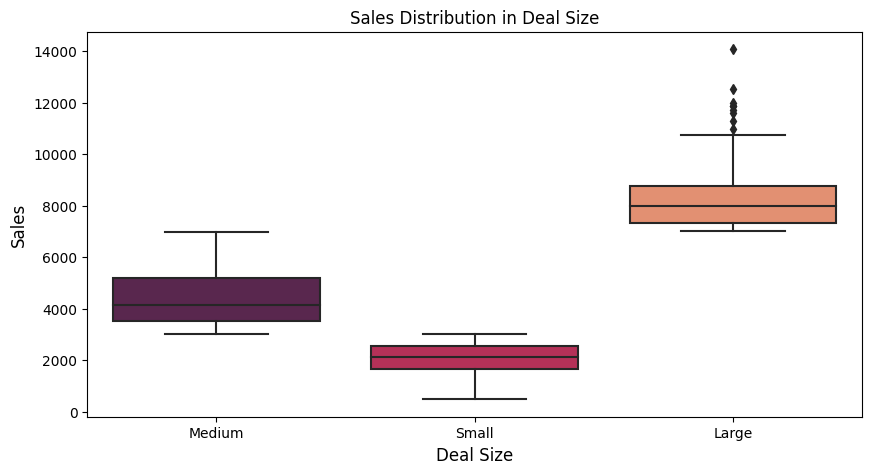

In [ ]:
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()


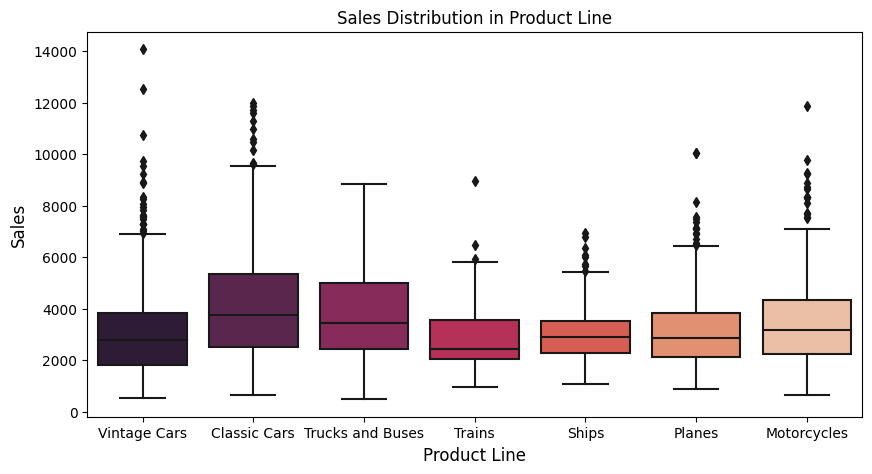

In [ ]:
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()


#### Yearly, Quarterly, Monthly, weekly Sales Trend

In [ ]:
# Extract year, month, week, and quarter from ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.week
df['Quarter'] = df['ORDERDATE'].dt.quarter


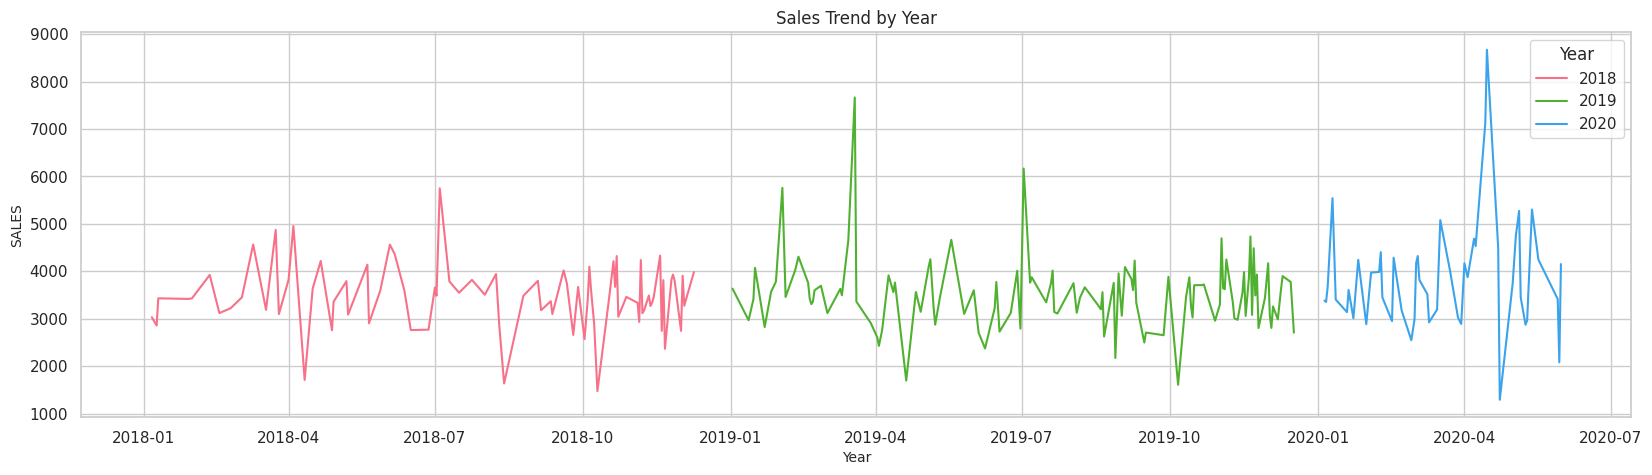

In [ ]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

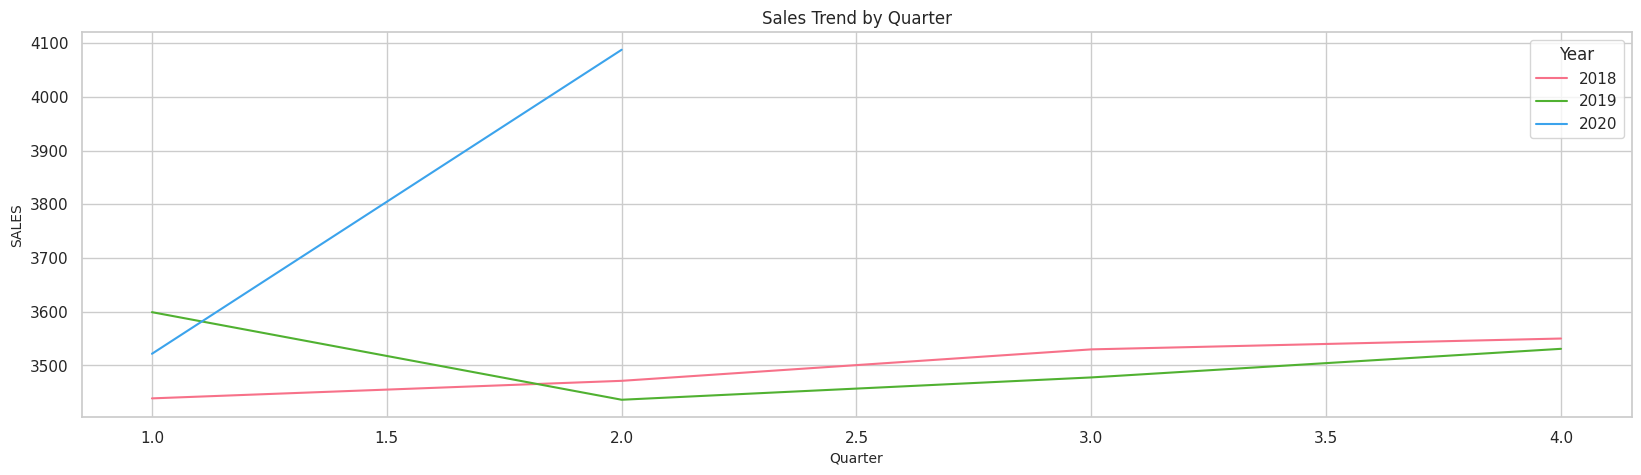

In [ ]:
# Sales trend by Quarter
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()


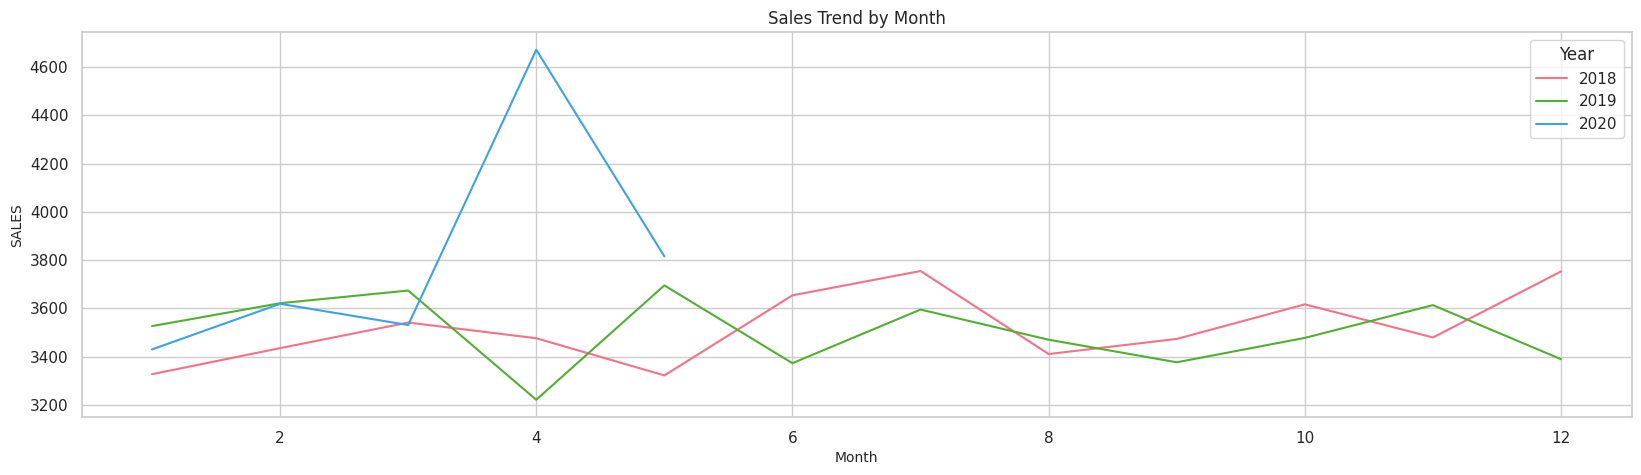

In [ ]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()


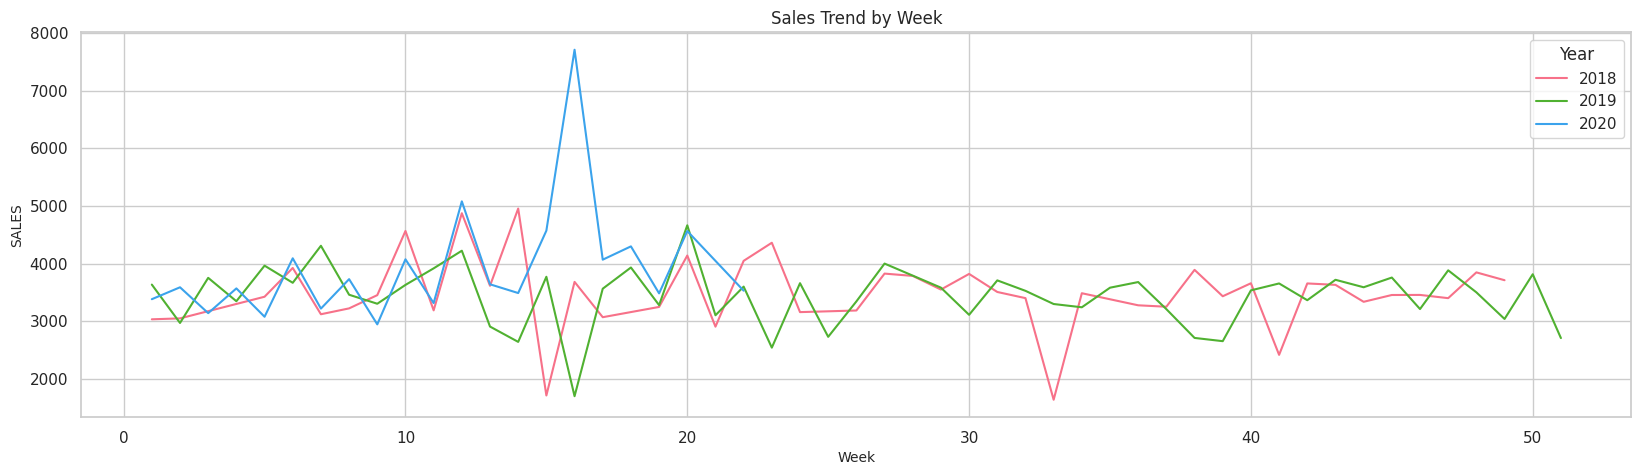

In [ ]:
# Sales trend by Week
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')

plt.show()


### Multivariate Analysis

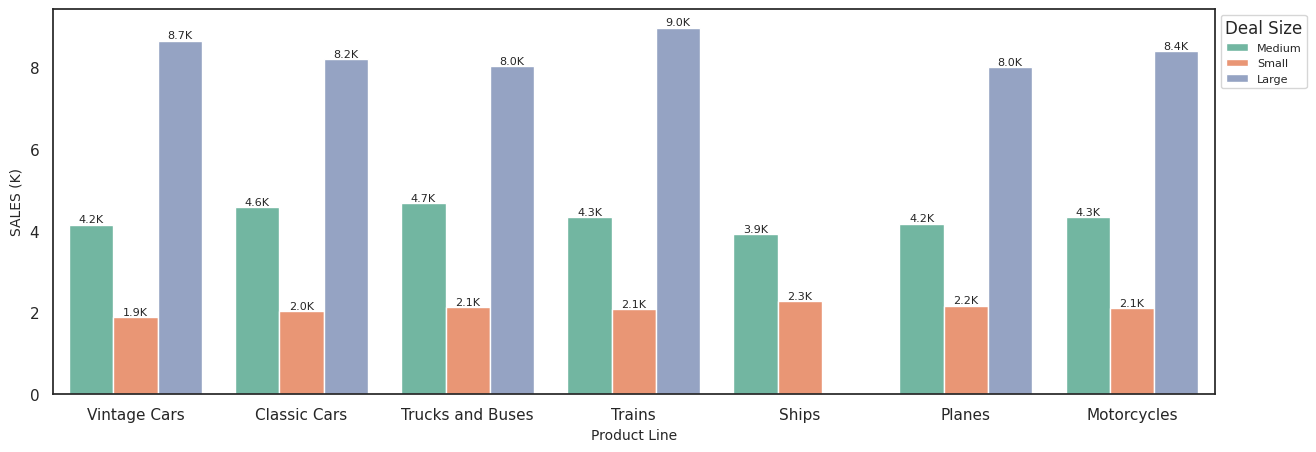

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


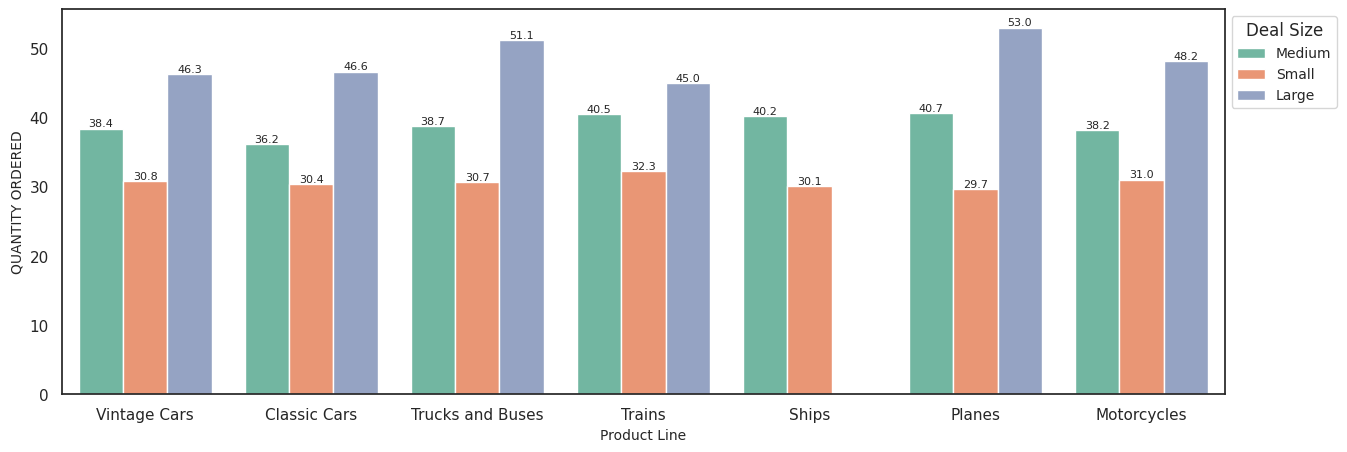

In [ ]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


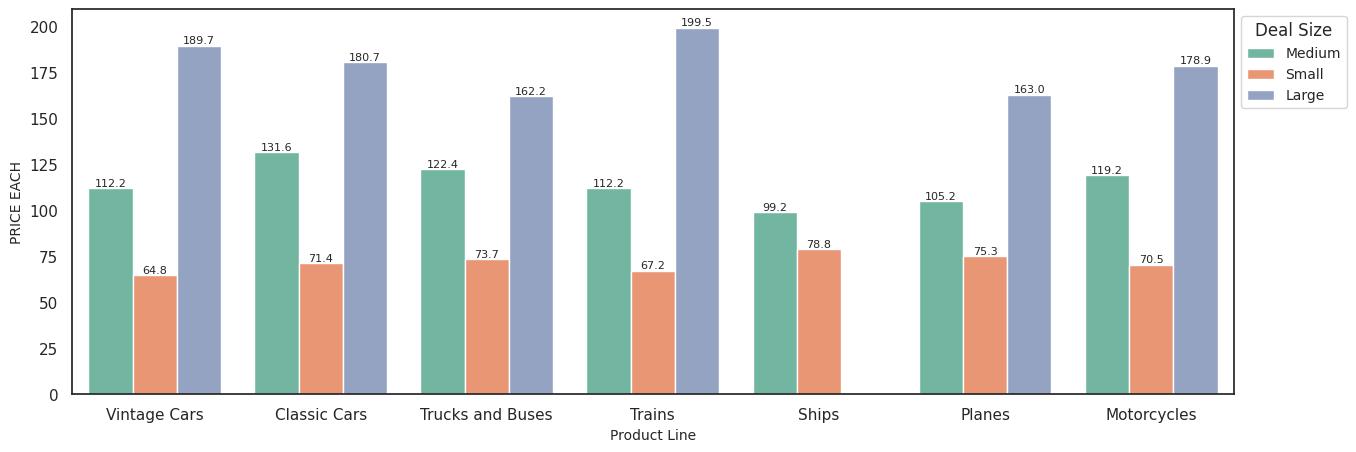

In [ ]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


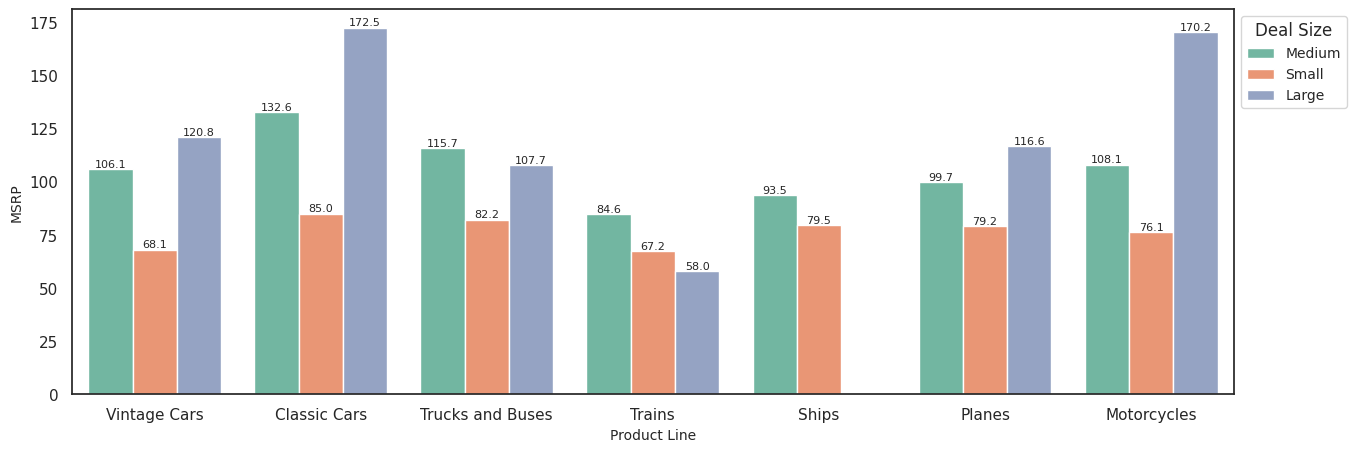

In [ ]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


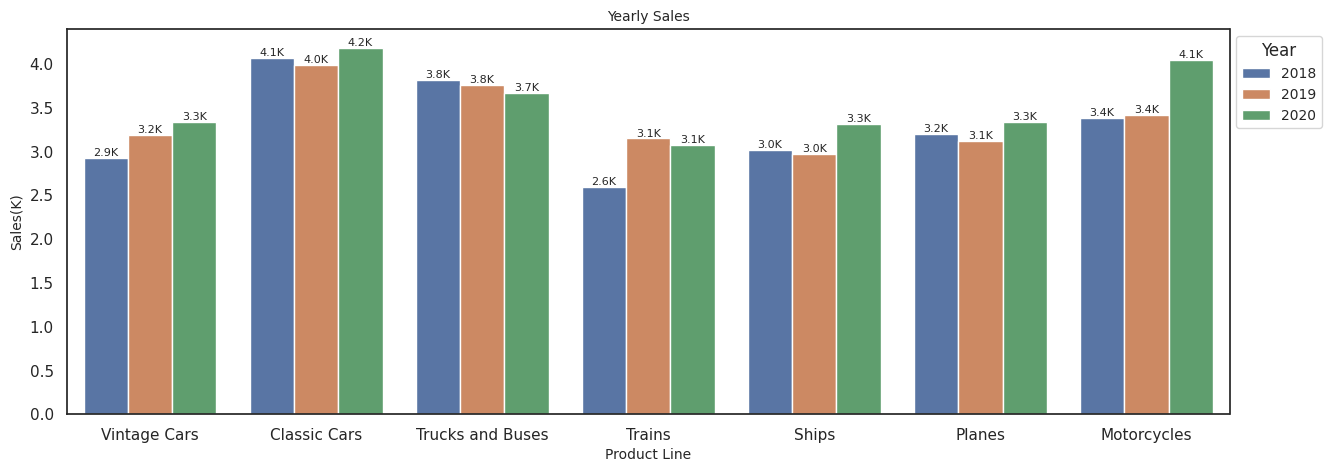

In [ ]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


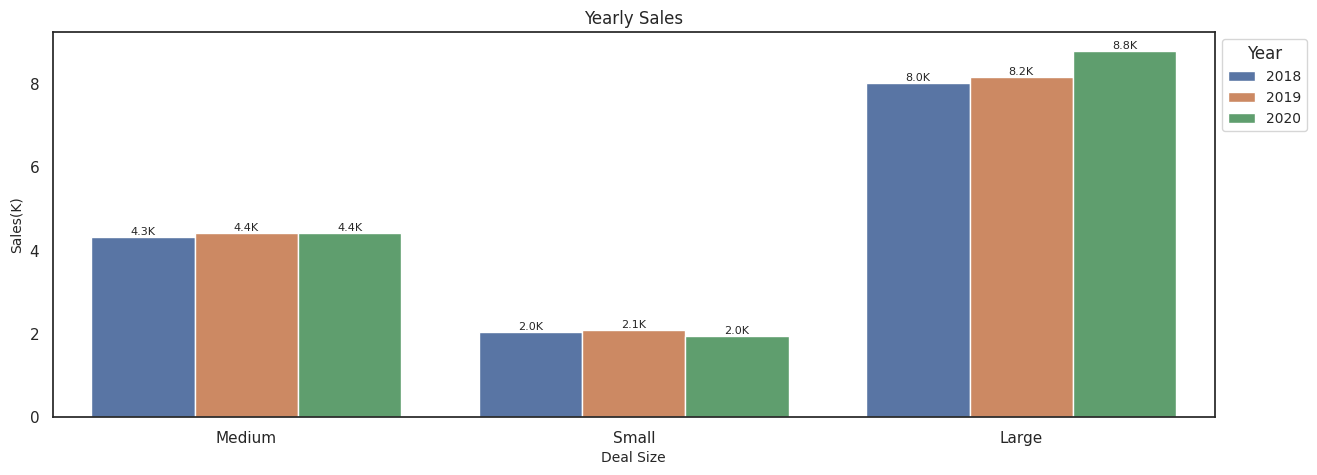

In [ ]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


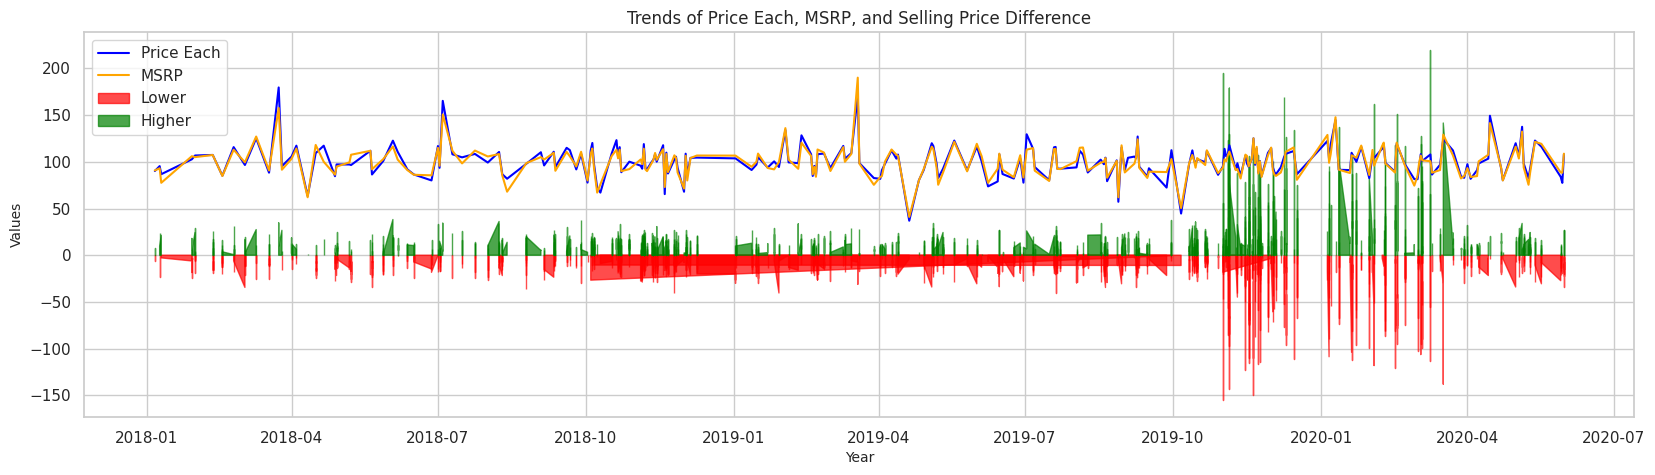

In [ ]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

### Exporting the data

In [ ]:
df.to_excel('Sales_data_processed.xlsx', index=False)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,...,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER,Year,Month,Week,Quarter,SALES (K),SELLING_PRICE_DIFF
0,10100,30,171.70,3,5151.00,2018-01-06,Shipped,Vintage Cars,170,S18_1749,...,Young,Valarie,Medium,877,2018,1,1,1,5.15100,1.70
1,10100,50,67.80,2,3390.00,2018-01-06,Shipped,Vintage Cars,60,S18_2248,...,Young,Valarie,Medium,877,2018,1,1,1,3.39000,7.80
2,10100,22,86.51,4,1903.22,2018-01-06,Shipped,Vintage Cars,92,S18_4409,...,Young,Valarie,Small,877,2018,1,1,1,1.90322,-5.49
3,10100,49,34.47,1,1689.03,2018-01-06,Shipped,Vintage Cars,41,S24_3969,...,Young,Valarie,Small,877,2018,1,1,1,1.68903,-6.53
4,10101,25,151.28,4,3782.00,2018-01-09,Shipped,Vintage Cars,127,S18_2325,...,Keitel,Roland,Medium,874,2018,1,2,1,3.78200,24.28


#Rest EDA is on Tableau